In [1]:
# for QR codes use inline
# %matplotlib inline
# qr_setting = 'url'
# qrviz_setting = 'show'
#
# for lecture use notebook
%matplotlib inline
qr_setting = None
#
%config InlineBackend.figure_format='retina'
# import libraries
import numpy as np
import matplotlib as mp
import pandas as pd
import matplotlib.pyplot as plt
import laUtilities as ut
import slideUtilities as sl
import demoUtilities as dm
import pandas as pd
from importlib import reload
from datetime import datetime
from IPython.display import Image
from IPython.display import display_html
from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML;

# Linear Models

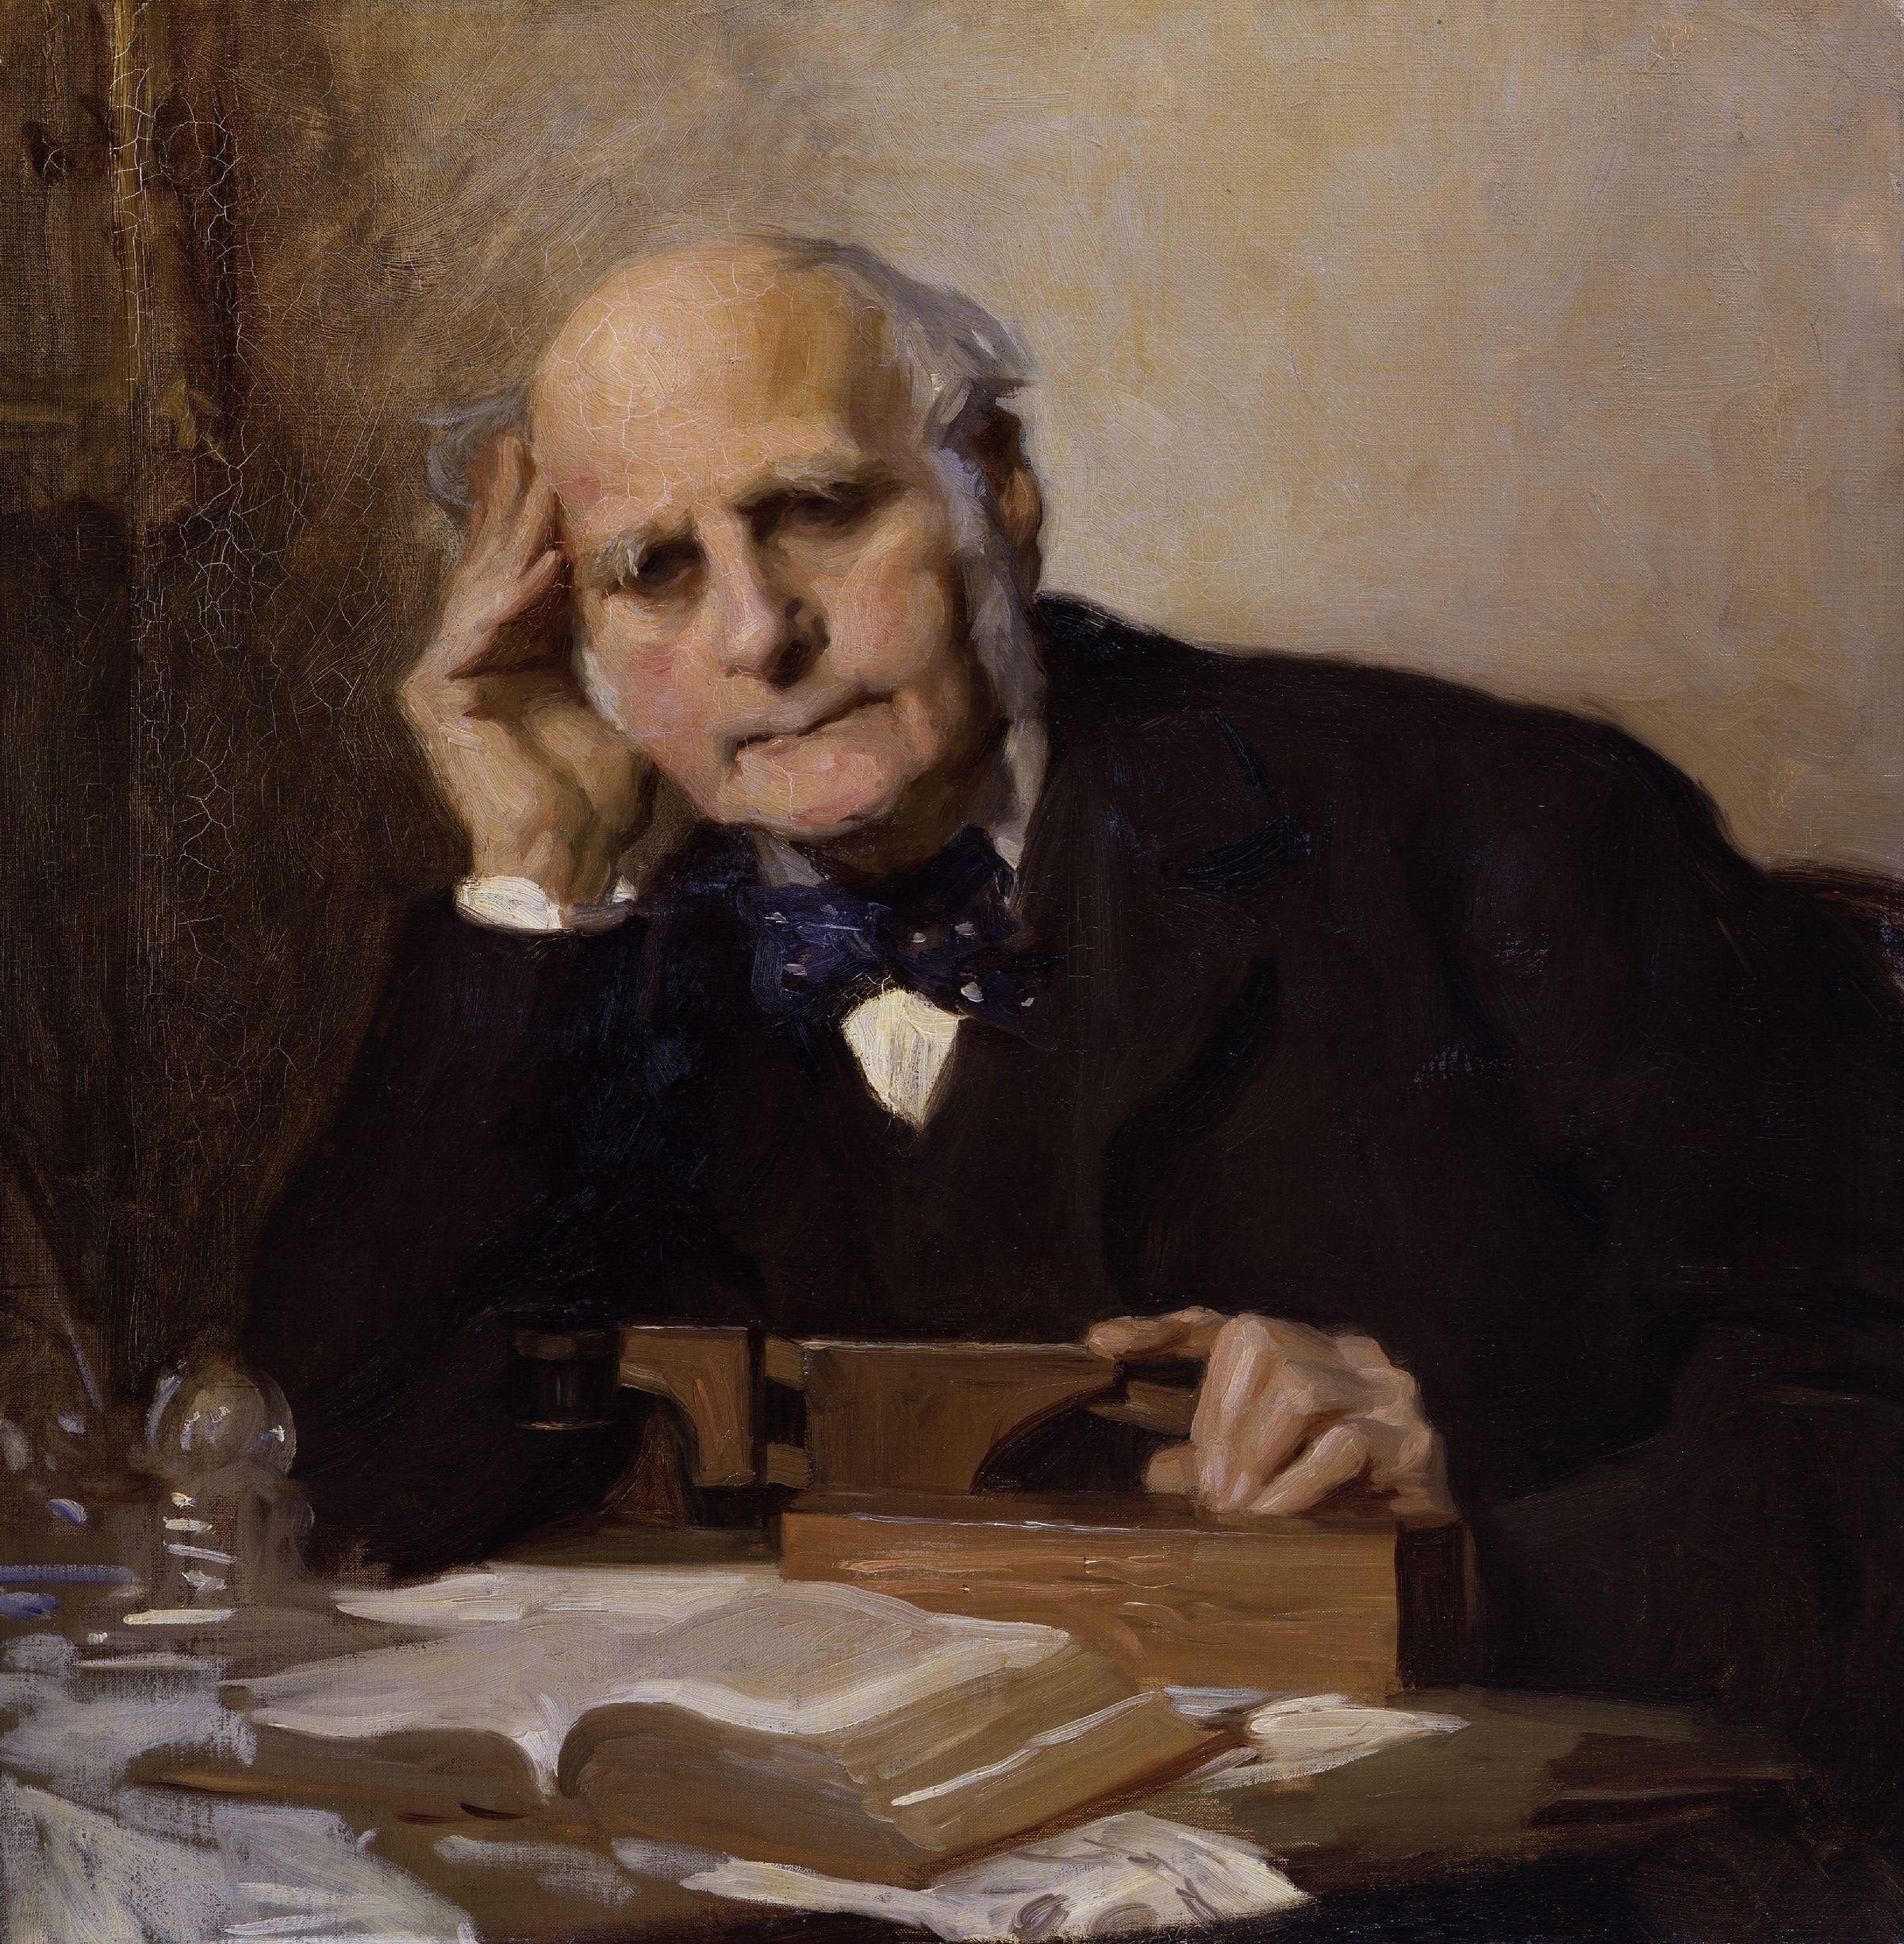

In [2]:
# image credit
display(Image("images/Sir_Francis_Galton_by_Charles_Wellington_Furse.jpg", width=550))

In [3]:
HTML(u'<a href="https://commons.wikimedia.org/wiki/File:Sir_Francis_Galton_by_Charles_Wellington_Furse.jpg#/media/File:Sir_Francis_Galton_by_Charles_Wellington_Furse.jpg">Sir Francis Galton by Charles Wellington Furse</a> by Charles Wellington Furse (died 1904) - <a href="//en.wikipedia.org/wiki/National_Portrait_Gallery,_London" class="extiw" title="en:National Portrait Gallery, London">National Portrait Gallery</a>: <a rel="nofollow" class="external text" href="http://www.npg.org.uk/collections/search/portrait.php?search=ap&amp;npgno=3916&amp;eDate=&amp;lDate=">NPG 3916</a>')

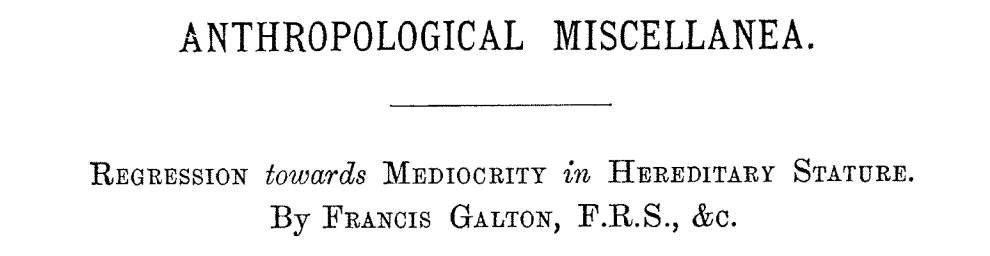

In [4]:
display(Image("images/galton-title.png", width=550))

In 1886 Francis Galton published his observations about how random factors affect outliers.

This notion has come to be called "regression to the mean" because unusually large or small phenomena, after the influence of random events, become closer to their mean values (less extreme).

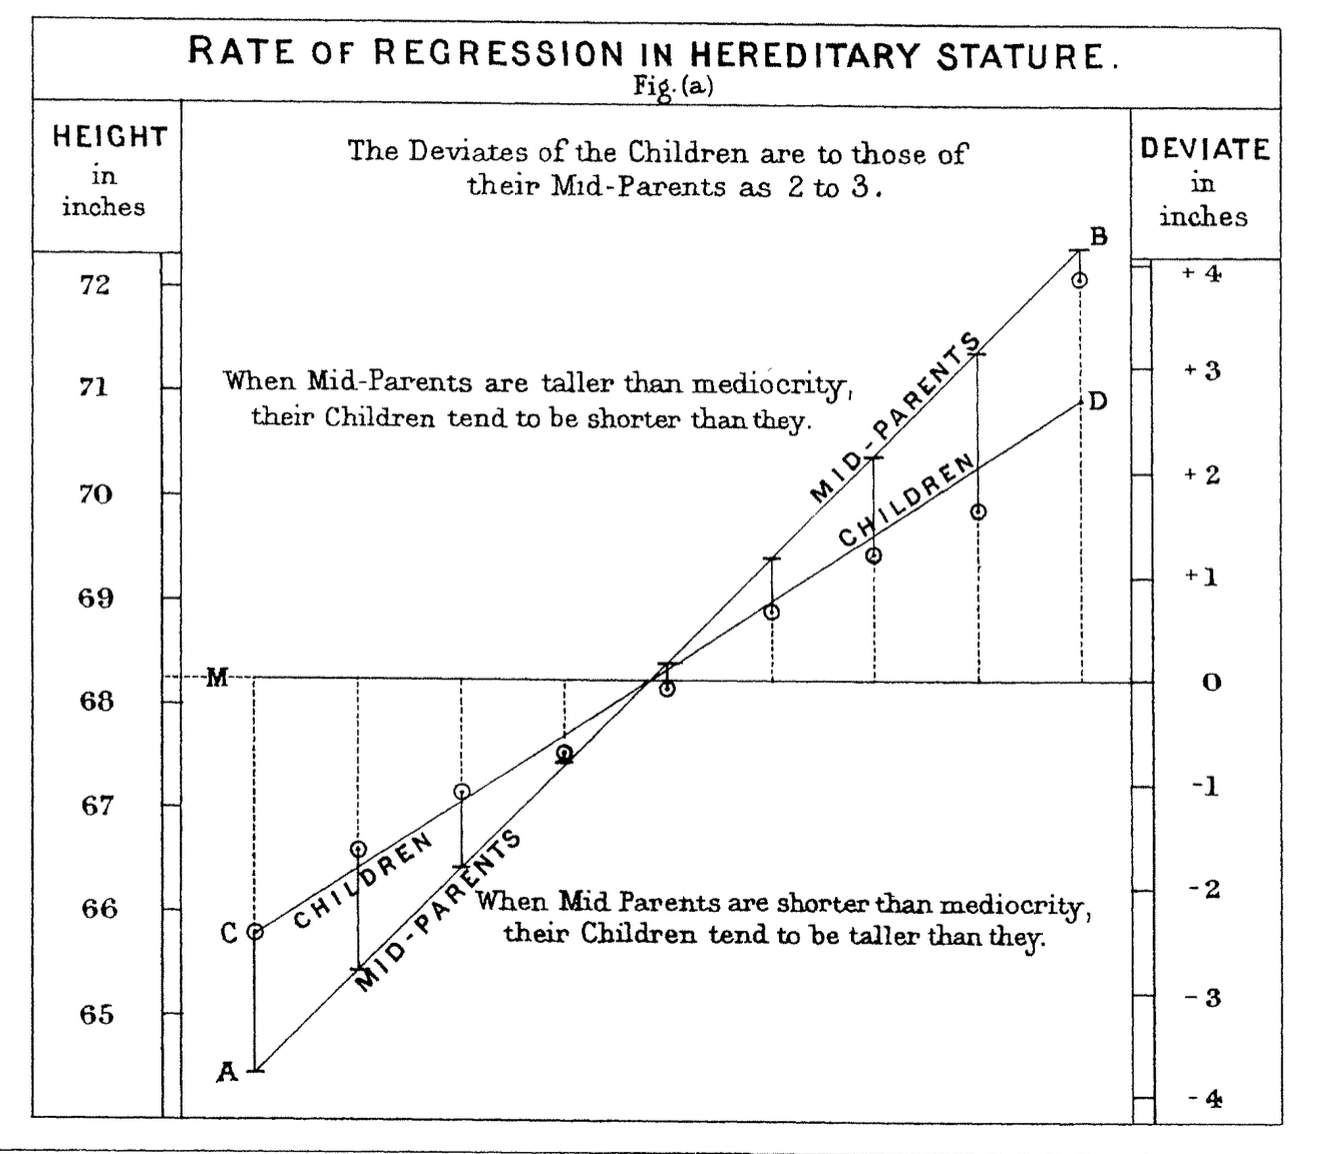

In [5]:
display(Image("images/galton-regression.png", width=550))

One of the most fundamental kinds of machine learning is the construction of a model that can be used to summarize a set of data.   

A model is a concise description of a dataset or a real-world phenomenon.

For example, an equation can be a model if we use the equation to describe something in the real world.

The most common form of modeling is __regression__, which means constructing an equation that describes the relationships among variables.

## Regression Problems

For example, we may look at these points and observe that they approximately lie on a line.

So we could decide to __model__ this data using a line.

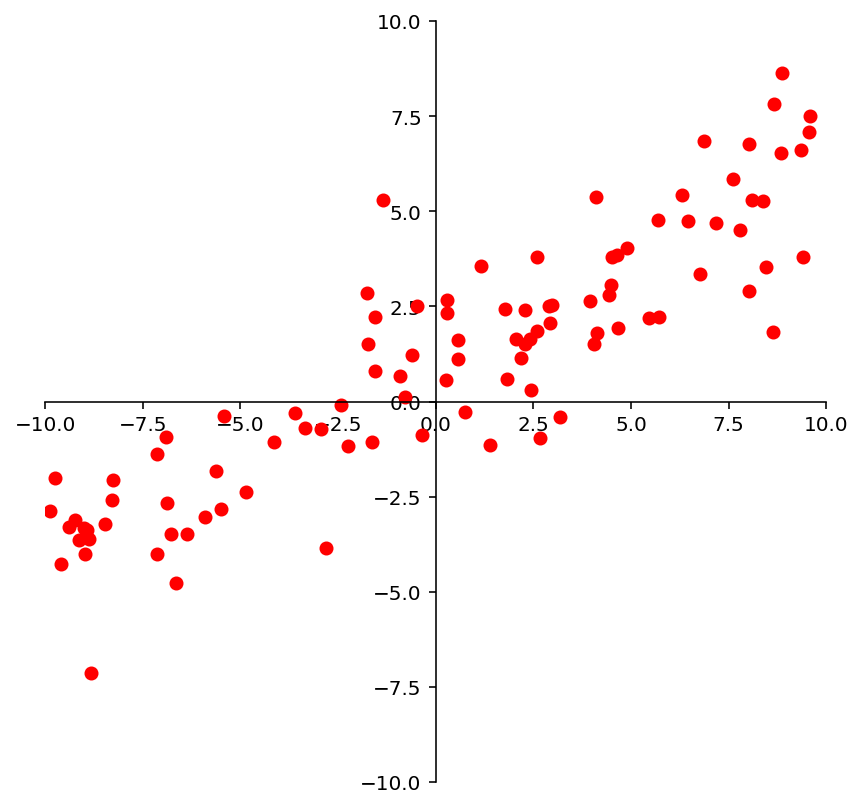

In [6]:
ax = ut.plotSetup(-10, 10, -10, 10, size = (7, 7))
ut.centerAxes(ax)
line = np.array([1, 0.5])
xlin = -10.0 + 20.0 * np.random.random(100)
ylin = line[0] + (line[1] * xlin) + np.random.normal(scale = 1.5, size = 100)
ax.plot(xlin, ylin, 'ro', markersize=6);

We may look at these points and decide to model them using a quadratic function.

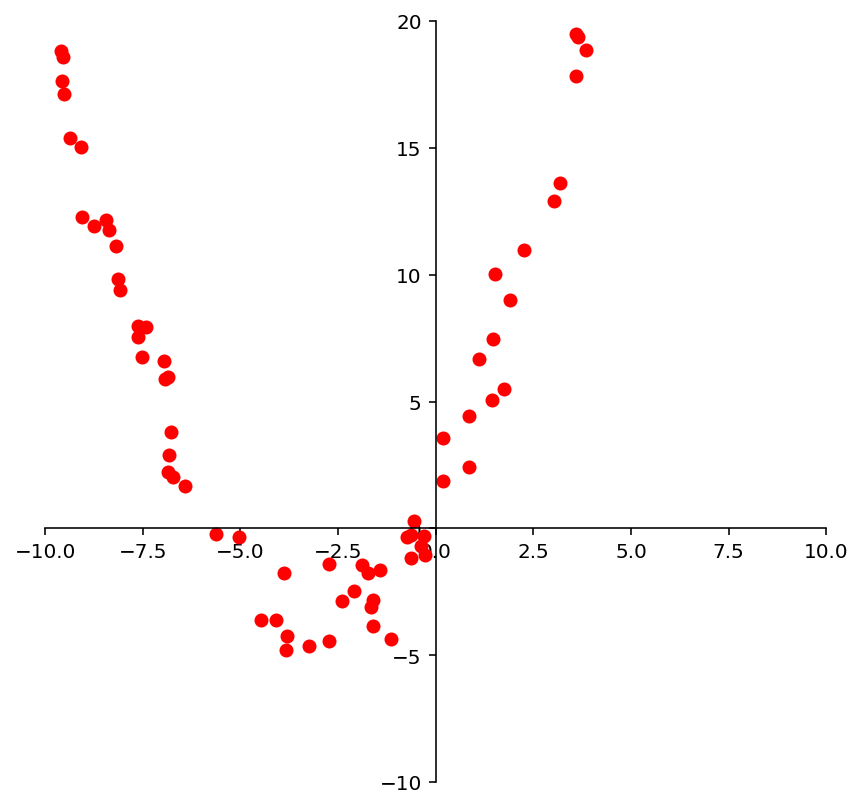

In [7]:
ax = ut.plotSetup(-10, 10, -10, 20, size = (7, 7))
ut.centerAxes(ax)
quad = np.array([1, 3, 0.5])
xquad = -10.0 + 20.0 * np.random.random(100)
yquad = quad[0] + (quad[1] * xquad) + (quad[2] * xquad * xquad) + np.random.normal(scale = 1.5, size = 100)
ax.plot(xquad, yquad, 'ro', markersize=6); 

And we may look at these points and decide to model them using a logarithmic function.

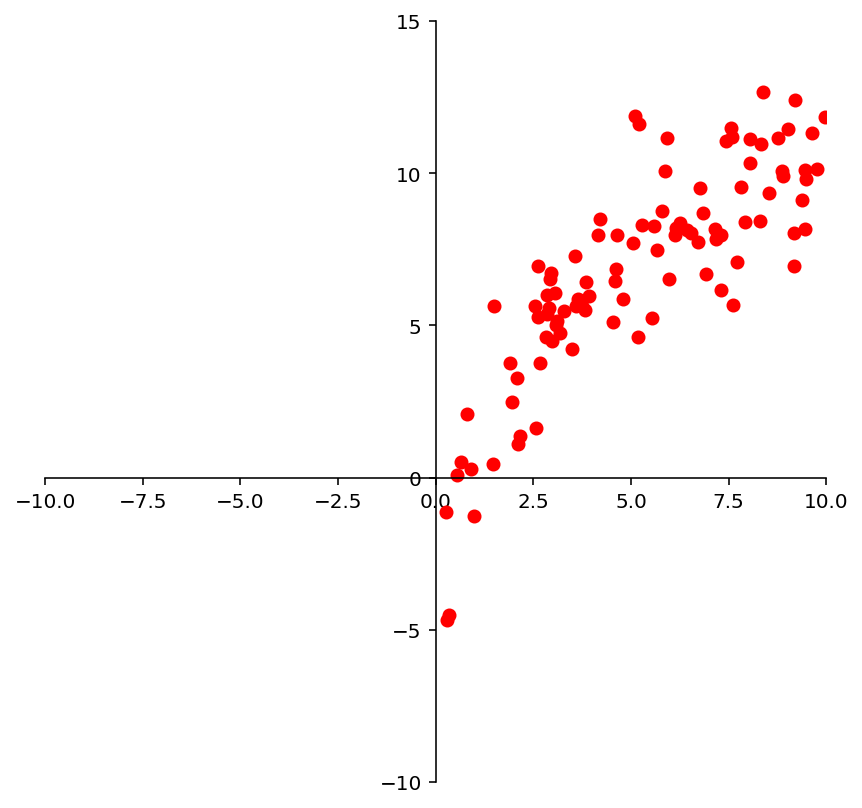

In [8]:
ax = ut.plotSetup(-10, 10, -10, 15, size = (7, 7))
ut.centerAxes(ax)
log = np.array([1, 4])
xlog = 10.0 * np.random.random(100)
ylog = log[0] + log[1] * np.log(xlog) + np.random.normal(scale = 1.5, size = 100)
ax.plot(xlog, ylog, 'ro', markersize=6);

Clearly, none of these datasets agrees perfectly with the proposed model.   So the question arises:

How do we find the __best__ linear function (or quadratic function, or logarithmic function) given the data?

## The Framework of Linear Models

The regression problem has been studied extensively in the field of statistics and machine learning. 

Certain terminology is used:

* Some values are referred to as "independent," and
* Some values are referred to as "dependent."

The basic regression task is: 
* given a set of independent variables 
* and the associated dependent variables, 
* estimate the parameters of a model (such as a line, parabola, etc) that describes how the dependent variables are related to the independent variables.

The independent variables are collected into a matrix $X,$ which is called the __design matrix.__

The dependent variables are collected into an __observation__ vector $\mathbf{y}.$

The parameters of the model (for any kind of model) are collected into a __parameter__ vector $\beta.$

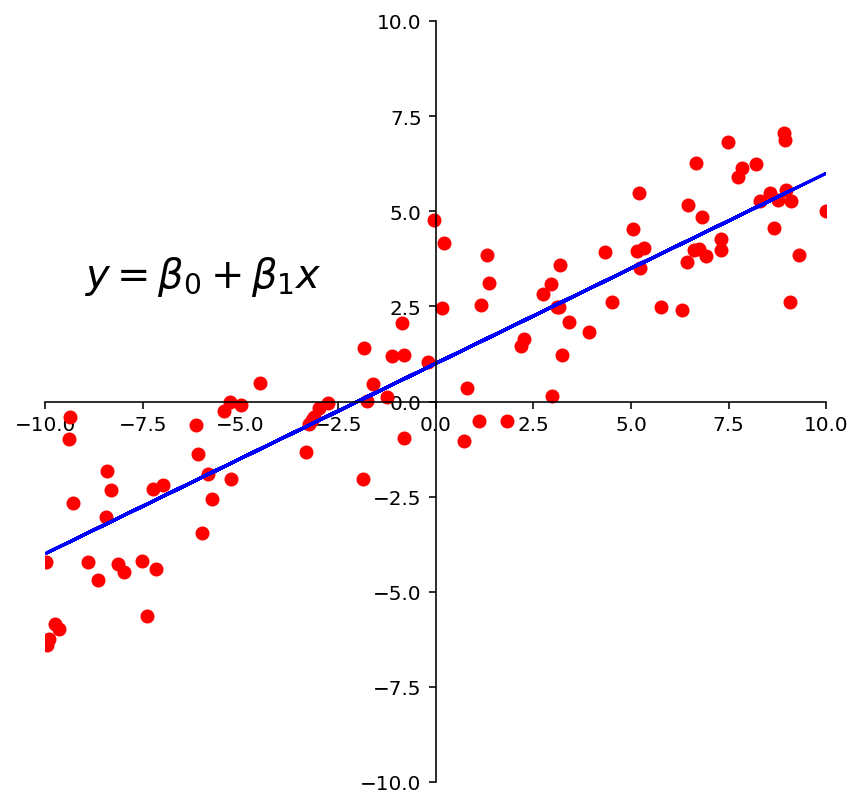

In [9]:
ax = ut.plotSetup(-10, 10, -10, 10, size = (7, 7))
ut.centerAxes(ax)
line = np.array([1, 0.5])
xlin = -10.0 + 20.0 * np.random.random(100)
ylin = line[0] + (line[1] * xlin) + np.random.normal(scale = 1.5, size = 100)
ax.plot(xlin, ylin, 'ro', markersize = 6)
ax.plot(xlin, line[0] + line[1] *xlin, 'b-')
plt.text(-9, 3, r'$y = \beta_0 + \beta_1x$', size=20); 

## Fitting a Line to Data

The first kind of model we'll study is a linear equation:

$$y = \beta_0 + \beta_1 x.$$

This is the most commonly used type of model, particularly in fields like economics, psychology, biology, etc.

The reason it is so commonly used is that, like Galton's data, experimental data often produce points $(x_1, y_1), \dots, (x_n,y_n)$ that seem to lie close to a line.   

The question we must confront is: given a set of data, how should we "fit" the equation of the line to the data?

Our intuition is this: we want to determine the parameters $\beta_0, \beta_1$ that define a line that is as "close" to the points as possible.

Let's develop some terminology for evaluating a model.

Suppose we have a line $y = \beta_0 + \beta_1 x$.   For each data point $(x_j, y_j),$ there is a point $(x_j, \beta_0 + \beta_1 x_j)$ that is the point on the line with the same $x$-coordinate.

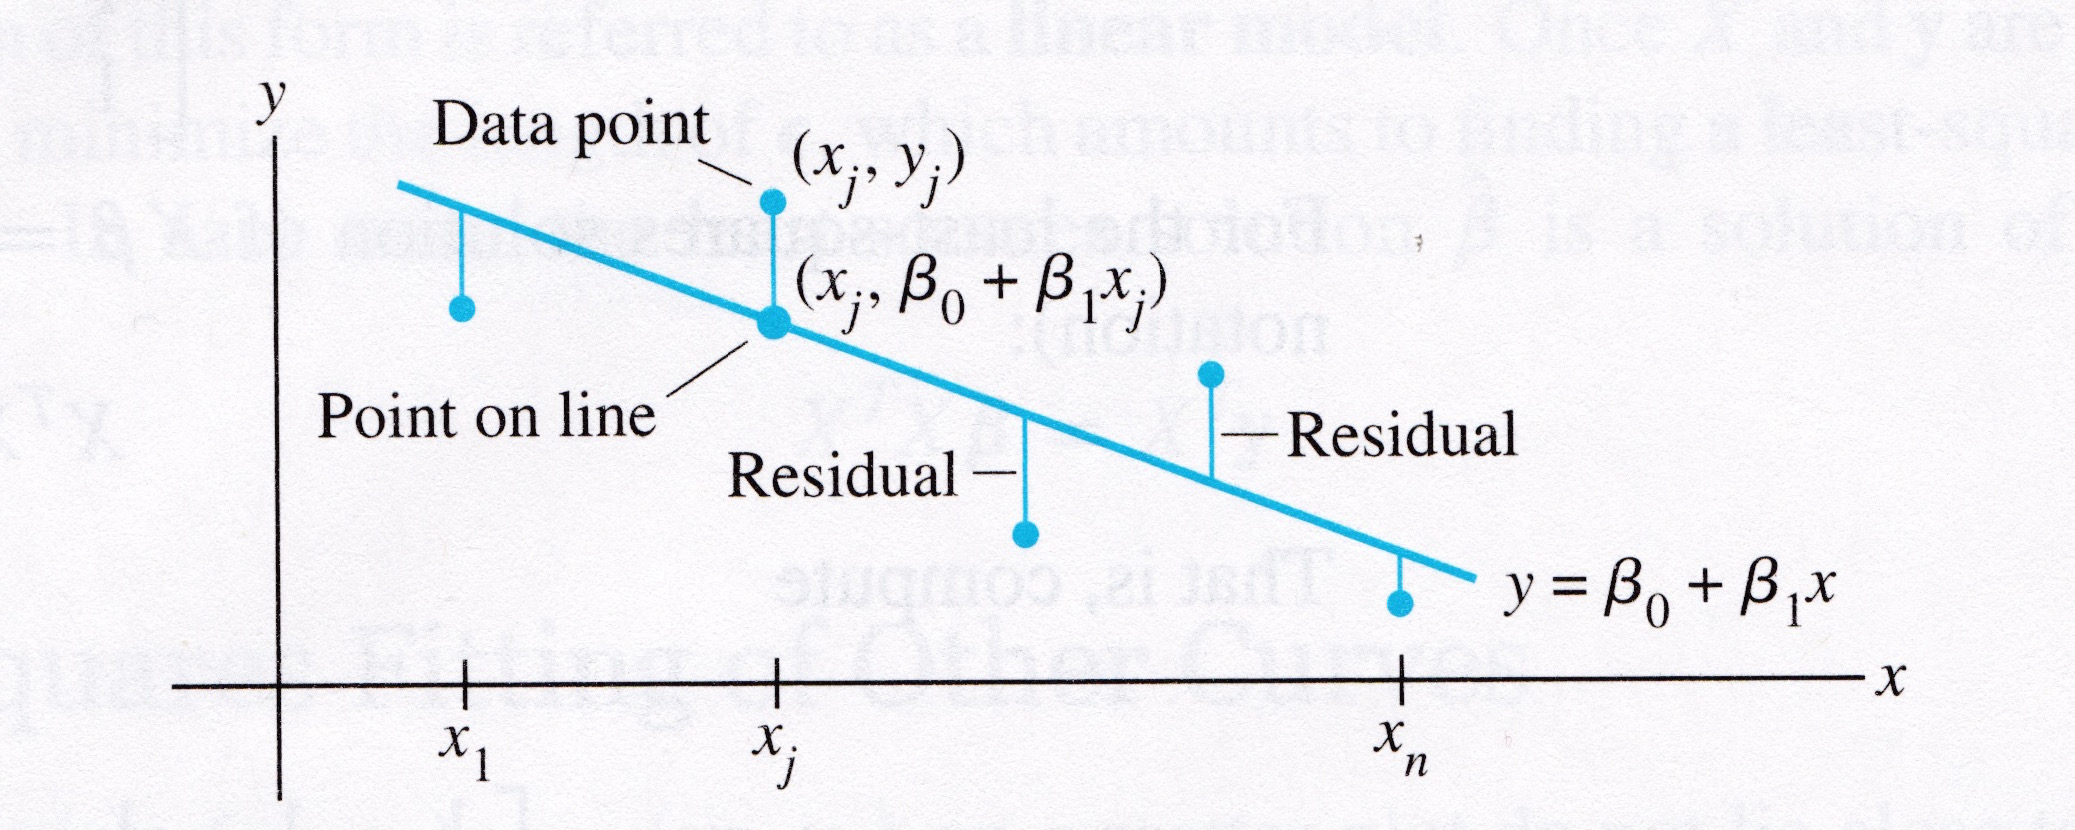

In [10]:
# image credit: Lay, LAA, 4th edition
display(Image("images/Lay-fig-6-6-1.jpg", width=550))

We call $y_j$ the __observed__ value of $y$ 

and we call $\beta_0 + \beta_1 x_j$ the __predicted__ $y$-value.   

The difference between an observed $y$-value and a predicted $y$-value is called a __residual__.

There are several ways to measure how "close" the line is to the data. 

The usual choice is to sum the squares of the residuals.  

(Note that the residuals themselves may be positive or negative -- by squaring them, we ensure that our error measures don't cancel out.)

The __least-squares line__ is the line $y = \beta_0 + \beta_1x$ that minimizes the sum of squares of the residuals. 

The coefficients $\beta_0, \beta_1$ of the line are called __regression coefficients.__

## A Least-Squares Problem

Let's imagine for a moment that the data fit a line perfectly.

Then, if each of the data points happened to fall exactly on the line, the parameters $\beta_0$ and $\beta_1$ would satisfy the equations

$$\beta_0 + \beta_1 x_1 = y_1 $$
$$\beta_0 + \beta_1 x_2 = y_2 $$
$$\beta_0 + \beta_1 x_3 = y_3 $$
$$ \vdots$$
$$\beta_0 + \beta_1 x_n = y_n $$

We can write this system as 

$$X\mathbf{\beta} = \mathbf{y}$$

where 

$$X=\begin{bmatrix}1&x_1\\1&x_2\\\vdots&\vdots\\1&x_n\end{bmatrix},\;\;\mathbf{\beta} = \begin{bmatrix}\beta_0\\\beta_1\end{bmatrix},\;\;\mathbf{y}=\begin{bmatrix}y_1\\y_2\\\vdots\\y_n\end{bmatrix}$$

Of course, if the data points don't actually lie exactly on a line, 

... then there are no parameters $\beta_0, \beta_1$ for which the predicted $y$-values in $X\mathbf{\beta}$ equal the observed $y$-values in $\mathbf{y}$, 

... and $X\mathbf{\beta}=\mathbf{y}$ has no solution.

Now, since the data doesn't fall exactly on a line, we have decided to seek the $\beta$ that minimizes the sum of squared residuals, ie,

$$\sum_i (\beta_0 + \beta_1 x_i - y_i)^2$$

$$=\Vert X\beta -\mathbf{y}\Vert^2$$

This is key: __the sum of squares of the residuals__ is __exactly__ the __square of the distance between the vectors $X\mathbf{\beta}$ and $\mathbf{y}.$__

This is a least-squares problem, $A\mathbf{x} = \mathbf{b},$ with different notation.

_Computing the least-squares solution of $X\mathbf{\beta} = \mathbf{y}$ is equivalent to finding the $\mathbf{\beta}$ that determines the least-squares line._

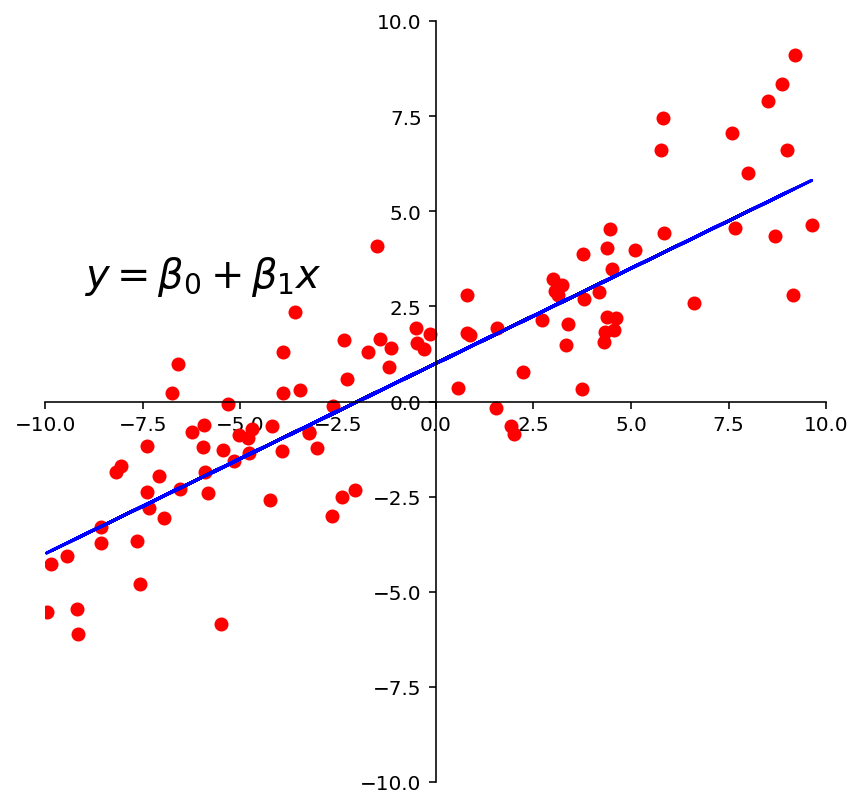

In [11]:
ax = ut.plotSetup(-10, 10, -10, 10, size = (7, 7))
ut.centerAxes(ax)
line = np.array([1, 0.5])
xlin = -10.0 + 20.0 * np.random.random(100)
ylin = line[0]+ (line[1] * xlin) + np.random.normal(scale = 1.5, size = 100)
ax.plot(xlin, ylin, 'ro', markersize=6)
ax.plot(xlin, line[0] + line[1] * xlin, 'b-')
plt.text(-9,3,r'$y = \beta_0 + \beta_1x$',size=20);

``` {toggle}
Question Time!  Q23.1
```

__Example 1.__  Find the equation $y = \beta_0 + \beta_1 x$ of the least-squares line that best fits the data points 

| x | y |
|---|---|
| 2 | 1 |
| 5 | 2 |
| 7 | 3 |
| 8 | 3 |

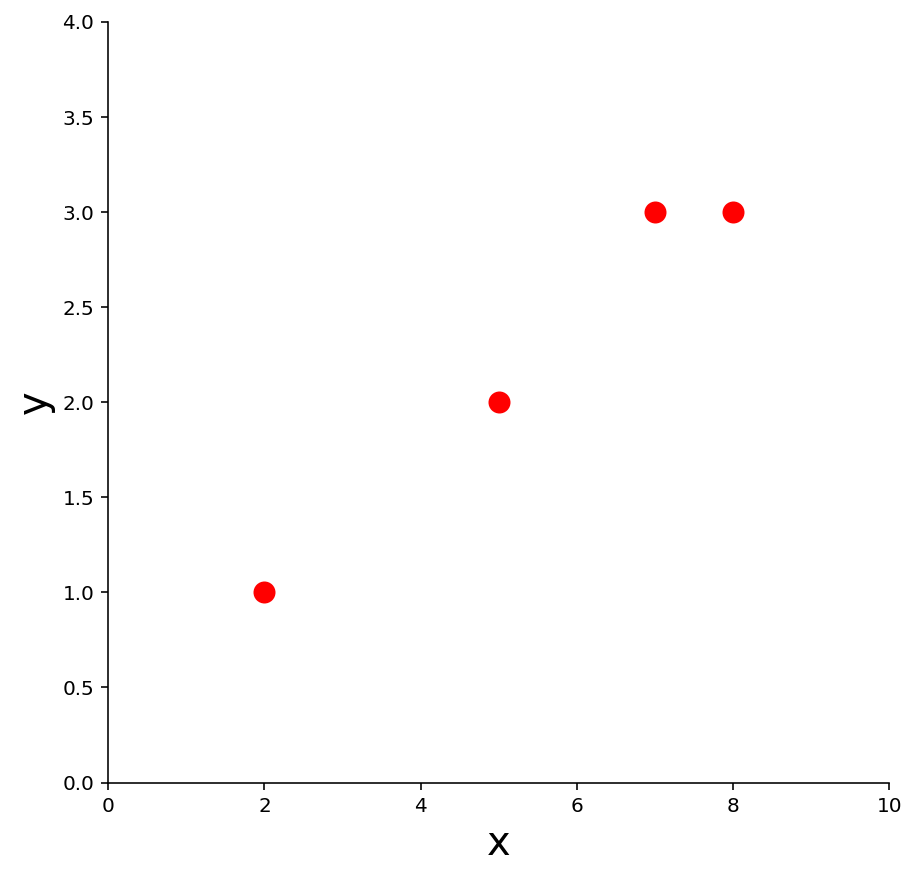

In [12]:
ax = ut.plotSetup(0, 10, 0, 4, size = (7, 7))
ut.centerAxes(ax)
pts = np.array([[2,1], [5,2], [7,3], [8,3]]).T
ax.plot(pts[0], pts[1], 'ro', markersize = 10);
plt.xlabel('x', size = 20)
plt.ylabel('y', size = 20);

__Solution.__ Use the $x$-coordinates of the data to build the design matrix $X$, and the $y$-coordinates to build the observation vector $\mathbf{y}$:

$$X = \begin{bmatrix}1&2\\1&5\\1&7\\1&8\end{bmatrix},\;\;\;\mathbf{y}=\begin{bmatrix}1\\2\\3\\3\end{bmatrix}$$

Now, to obtain the least-squares line, find the least-squares solution to $X\mathbf{\beta} = \mathbf{y}.$

We do this via the method we learned last lecture (just with new notation):

$$X^TX\mathbf{\beta} = X^T\mathbf{y}$$

So, we compute:
    
$$X^TX = \begin{bmatrix}1&1&1&1\\2&5&7&8\end{bmatrix}\begin{bmatrix}1&2\\1&5\\1&7\\1&8\end{bmatrix} = \begin{bmatrix}4&22\\22&142\end{bmatrix}$$

$$X^T\mathbf{y} =  \begin{bmatrix}1&1&1&1\\2&5&7&8\end{bmatrix}\begin{bmatrix}1\\2\\3\\3\end{bmatrix} = \begin{bmatrix}9\\57\end{bmatrix}$$

So the normal equations are:
    
$$\begin{bmatrix}4&22\\22&142\end{bmatrix}\begin{bmatrix}\beta_0\\\beta_1\end{bmatrix} = \begin{bmatrix}9\\57\end{bmatrix}$$

Solving, we get:
    
$$\begin{bmatrix}\beta_0\\\beta_1\end{bmatrix}=\begin{bmatrix}4&22\\22&142\end{bmatrix}^{-1}\begin{bmatrix}9\\57\end{bmatrix}$$

$$ = \frac{1}{84}\begin{bmatrix}142&-22\\-22&4\end{bmatrix}\begin{bmatrix}9\\57\end{bmatrix}$$

$$ = \begin{bmatrix}2/7\\5/14\end{bmatrix}$$

So the least-squares line has the equation

$$y = \frac{2}{7} + \frac{5}{14}x.$$

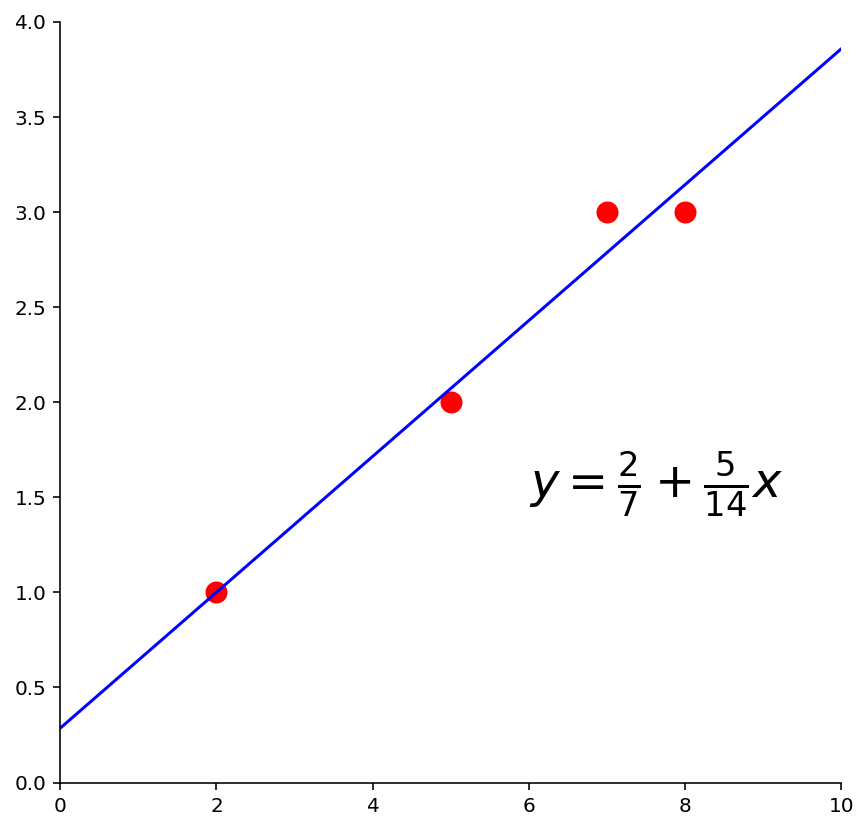

In [13]:
ax = ut.plotSetup(0, 10, 0, 4, size = (7, 7))
ut.centerAxes(ax)
pts = np.array([[2,1], [5,2], [7,3], [8,3]]).T
ax.plot(pts[0], pts[1], 'ro', markersize = 10)
ut.plotLinEqn(-5./14, 1, 2./7, color='b')
plt.text(6,1.5, r'$y = \frac{2}{7} + \frac{5}{14}x$', size=24);

## The General Linear Model

Another way that the inconsistent linear system is often written is to collect all the residuals into a __residual vector.__ 

Then an exact equation is

$$y = X\mathbf{\beta} + {\mathbf\epsilon}$$

Any equation of this form is referred to as a __linear model.__ 

In this formulation, the goal is to minimize the length of $\epsilon$, ie, $\Vert\epsilon\Vert.$

In some cases, one would like to fit data points with something other than a straight line.  

For example, think of Gauss trying to find the equation for the orbit of Ceres.

In cases like this, the matrix equation is still $X\mathbf{\beta} = \mathbf{y}$, but the specific form of $X$ changes from one problem to the next.

The least-squares solution $\hat{\mathbf{\beta}}$ is a solution of the normal equations

$$X^TX\mathbf{\beta} = X^T\mathbf{y}.$$

## Least-Squares Fitting of Other Models

Most models have parameters, and the object of __model fitting__ is to to fix those parameters.   Let's talk about model parameters.

In model fitting, the parameters are the unknown.  A central question for us is whether the model is _linear_ in its parameters.

For example, the model $y = \beta_0 e^{-\beta_1 x}$ is __not__ linear in its parameters.  

The model $y = \beta_0 e^{-2 x}$ __is__ linear in its parameters.

For a model that is linear in its parameters, an observation is a linear combination of (arbitrary) known functions.

In other words, a model that is linear in its parameters is

$$y = \beta_0f_0(x) + \beta_1f_1(x) + \dots + \beta_nf_n(x)$$

where $f_0, \dots, f_n$ are known functions and $\beta_0,\dots,\beta_k$ are parameters.

__Example.__  Suppose data points $(x_1, y_1), \dots, (x_n, y_n)$ appear to lie along some sort of parabola instead of a straight line.  Suppose we wish to approximate the data by an equation of the form

$$y = \beta_0 + \beta_1x + \beta_2x^2.$$

Describe the linear model that produces a "least squares fit" of the data by the equation.

__Solution.__  The ideal relationship is $y = \beta_0 + \beta_1x + \beta_2x^2.$

Suppose the actual values of the parameters are $\beta_0, \beta_1, \beta_2.$  Then the coordinates of the first data point satisfy the equation

$$y_1 = \beta_0 + \beta_1x_1 + \beta_2x_1^2 + \epsilon_1$$

where $\epsilon_1$ is the residual error between the observed value $y_1$ and the predicted $y$-value.

Each data point determines a similar equation:

$$y_1 = \beta_0 + \beta_1x_1 + \beta_2x_1^2 + \epsilon_1$$
$$y_2 = \beta_0 + \beta_1x_2 + \beta_2x_2^2 + \epsilon_2$$
$$\vdots$$
$$y_n = \beta_0 + \beta_1x_n + \beta_2x_n^2 + \epsilon_n$$

Clearly, this system can be written as $\mathbf{y} = X\mathbf{\beta} + \mathbf{\epsilon}.$

$$\begin{bmatrix}y_1\\y_2\\\vdots\\y_n\end{bmatrix} = \begin{bmatrix}1&x_1&x_1^2\\1&x_2&x_2^2\\\vdots&\vdots&\vdots\\1&x_n&x_n^2\end{bmatrix} \begin{bmatrix}\beta_0\\\beta_1\\\beta_2\end{bmatrix} + \begin{bmatrix}\epsilon_1\\\epsilon_2\\\vdots\\\epsilon_n\end{bmatrix}$$

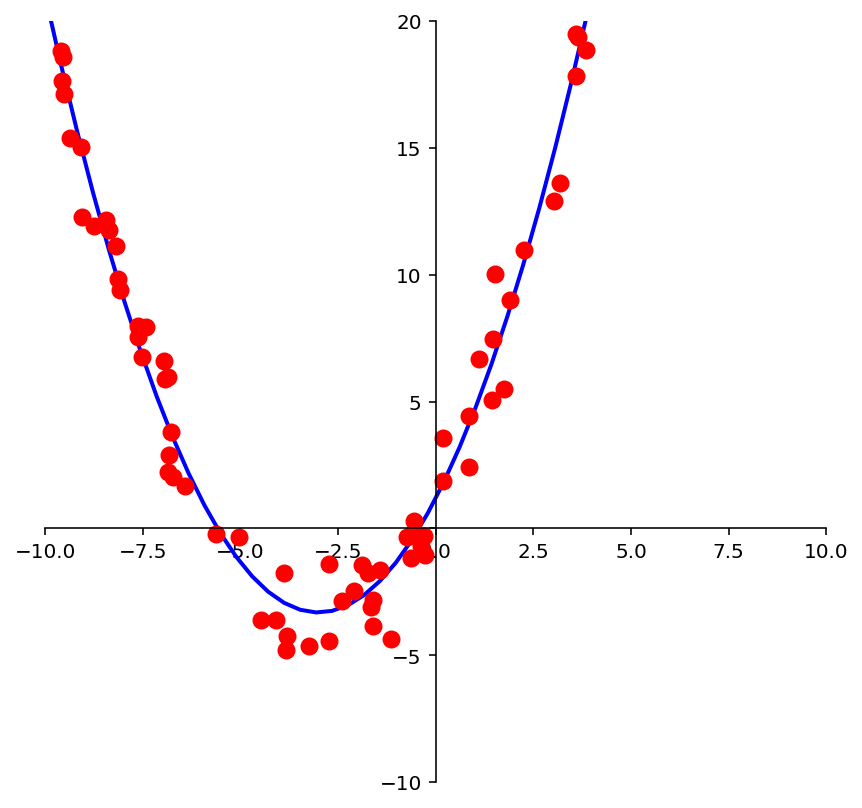

In [14]:
m = np.shape(xquad)[0]
X = np.array([np.ones(m), xquad,xquad**2]).T
beta = np.linalg.inv(X.T @ X) @ X.T @ yquad
#
ax = ut.plotSetup(-10, 10, -10, 20, size = (7, 7))
ut.centerAxes(ax)
xplot = np.linspace(-10, 10, 50)
yestplot = beta[0] + beta[1]  * xplot + beta[2] * xplot**2
ax.plot(xplot, yestplot, 'b-', lw=2)
ax.plot(xquad, yquad, 'ro', markersize = 8);

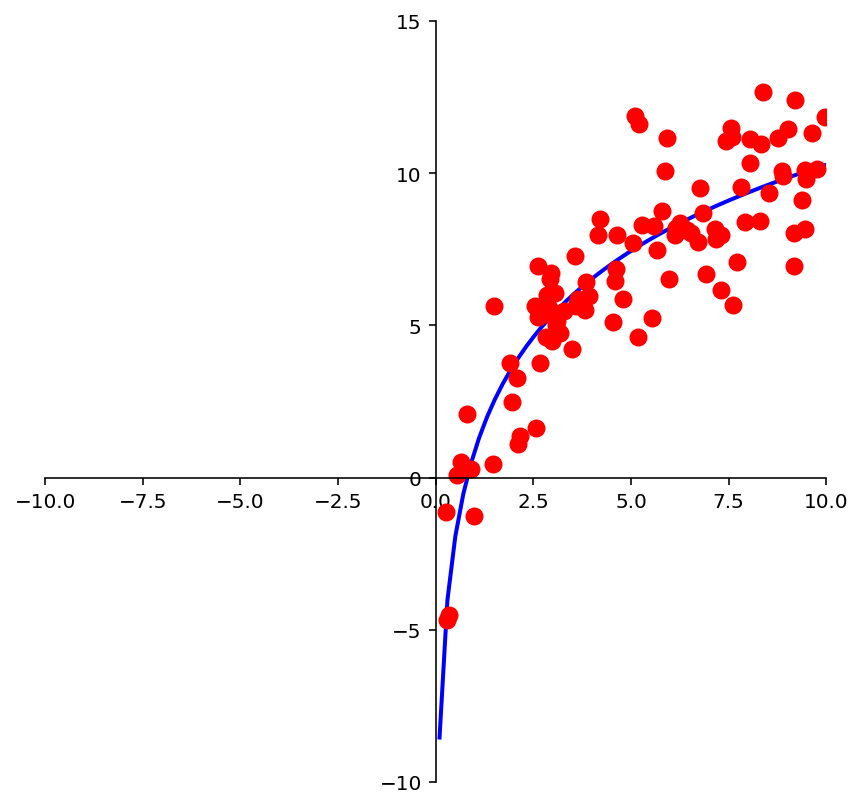

In [15]:
m = np.shape(xlog)[0]
X = np.array([np.ones(m), np.log(xlog)]).T
beta = np.linalg.inv(X.T @ X) @ X.T @ ylog
# 
ax = ut.plotSetup(-10, 10, -10, 15, size = (7, 7))
ut.centerAxes(ax)
xplot = np.linspace(0.1, 10, 50)
yestplot = beta[0] + beta[1] * np.log(xplot)
ax.plot(xplot, yestplot, 'b-', lw=2)
ax.plot(xlog, ylog, 'ro', markersize = 8);

``` {toggle}
Question Time!  Q23.2
```

## Multiple Regression

Suppose an experiment involves two independent variables -- say, $u$ and $v$, -- and one dependent variable, $y$.

A linear equation for predicting $y$ from $u$ and $v$ has the form

$$y = \beta_0 + \beta_1 u + \beta_2 v$$

Since there is more than one independent variable, this is called __multiple regression.__

A more general prediction equation might have the form

$$y = \beta_0 + \beta_1 u + \beta_2 v + \beta_3u^2 + \beta_4 uv + \beta_5 v^2$$

A least squares fit to equations like this is called a __trend surface.__

In general, a linear model will arise whenever $y$ is to be predicted by an equation of the form

$$y = \beta_0f_0(u,v) + \beta_1f_1(u,v) + \cdots + \beta_kf_k(u,v)$$

with $f_0,\dots,f_k$ any sort of known functions and $\beta_0,...,\beta_k$ unknown weights.

__Example.__  In geography, local models of terrain are constructed from data $(u_1, v_1, y_1), \dots, (u_n, v_n, y_n)$ where $u_j, v_j$, and $y_j$ are latitude, longitude, and altitude, respectively.

Let's take an example.   Here are a set of points in $\mathbb{R}^3$:

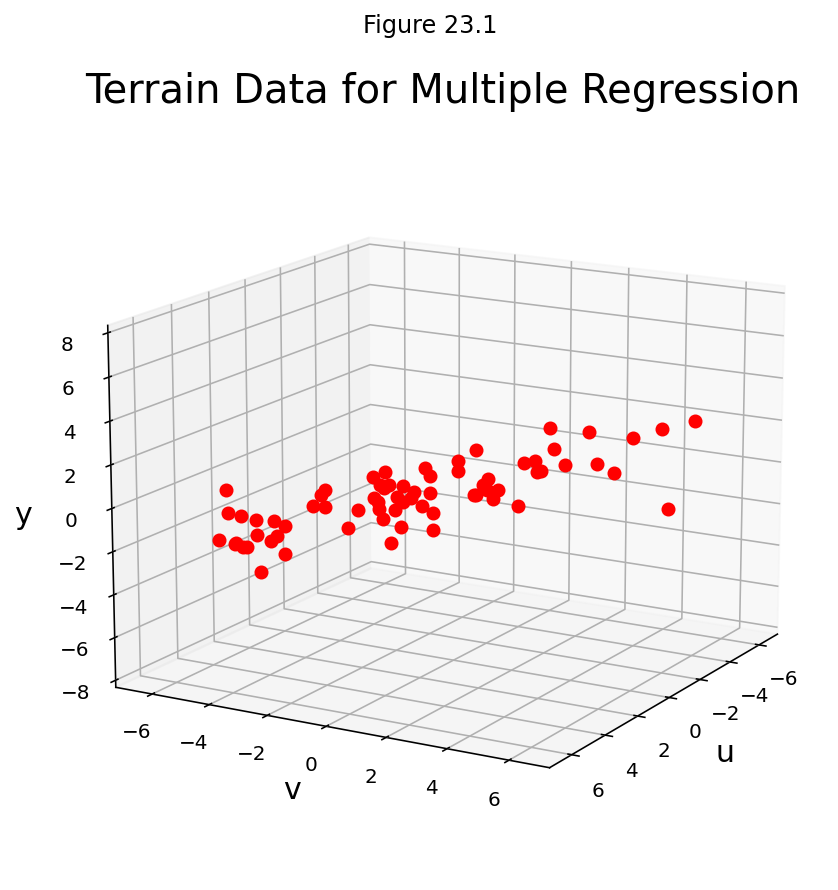

In [16]:
fig = ut.three_d_figure((23, 1), 'multivariate regression example', 
                       -7, 7, -7, 7, -8, 8,
                        equalAxes = False, figsize = (7, 7), qr = qr_setting)
np.random.seed(6)
v = [4.0,  4.0, 2.0]
u = [-4.0, 3.0, 1.0]
npts = 70
# set locations of points that fall within x,y
xc = -7.0 + 14.0 * np.random.random(npts)
yc = -7.0 + 14.0 * np.random.random(npts)
A = np.array([u,v]).T
# project these points onto the plane
P = A @ np.linalg.inv(A.T @ A) @ A.T
coords = P @ np.array([xc,yc,np.zeros(npts)])
coords[2] += np.random.normal(scale = 1, size = npts)
for i in range(coords.shape[-1]):
    fig.plotPoint(coords[0,i],coords[1,i], coords[2,i], 'r')
fig.set_title('Terrain Data for Multiple Regression', 'Terrain Data for Multiple Regression', size = 20)
fig.ax.set_zlabel('y')
fig.ax.set_xlabel('u')
fig.ax.set_ylabel('v')
fig.desc['xlabel'] = 'u'
fig.desc['ylabel'] = 'v'
fig.desc['zlabel'] = 'y'
fig.ax.view_init(azim=30, elev = 15)
fig.save();

Let's describe the linear models that gives a least-squares fit to such data.  The solution is called the least-squares _plane._

__Solution.__  We expect the data to satisfy these equations:

$$y_1 = \beta_0 + \beta_1 u_1 + \beta_2 v_1 + \epsilon_1$$
$$y_1 = \beta_0 + \beta_1 u_2 + \beta_2 v_2 + \epsilon_2$$
$$\vdots$$
$$y_1 = \beta_0 + \beta_1 u_n + \beta_2 v_n + \epsilon_n$$

This system has the matrix for $\mathbf{y} = X\mathbf{\beta} + \epsilon,$ where

$$\mathbf{y} = \begin{bmatrix}y_1\\y_1\\\vdots\\y_n\end{bmatrix},\;\;X = \begin{bmatrix}1&u_1&v_1\\1&u_2&v_2\\\vdots&\vdots&\vdots\\1&u_n&v_n\end{bmatrix},\;\;\mathbf{\beta}=\begin{bmatrix}\beta_0\\\beta_1\\\beta_2\end{bmatrix},\;\;\epsilon = \begin{bmatrix}\epsilon_1\\\epsilon_2\\\vdots\\\epsilon_n\end{bmatrix}$$

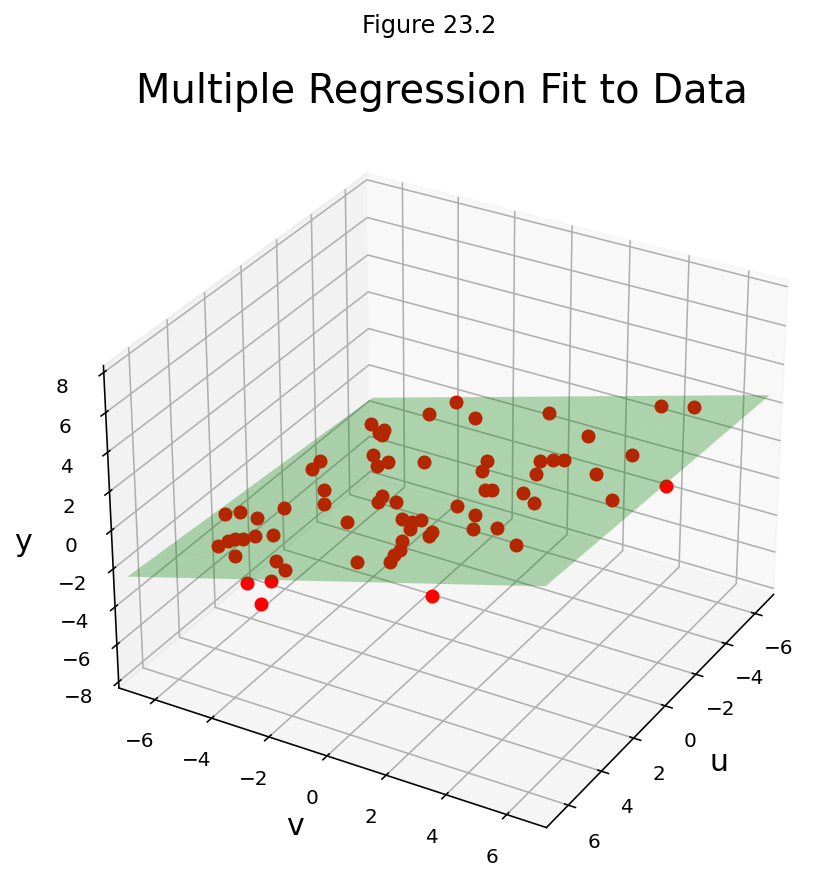

In [17]:
fig = ut.three_d_figure((23, 2), 'multivariate regression example with fitted plane', 
                       -7, 7, -7, 7, -8, 8,
                        equalAxes = False, figsize = (7, 7), qr = qr_setting)
np.random.seed(6)
v = [4.0,  4.0, 2.0]
u = [-4.0, 3.0, 1.0]
npts = 70
# set locations of points that fall within x,y
xc = -7.0 + 14.0 * np.random.random(npts)
yc = -7.0 + 14.0 * np.random.random(npts)
A = np.array([u,v]).T
# project these points onto the plane
P = A @ np.linalg.inv(A.T @ A) @ A.T
coords = P @ np.array([xc,yc,np.zeros(npts)])
coords[2] += np.random.normal(scale = 1, size = npts)
for i in range(coords.shape[-1]):
    fig.plotPoint(coords[0,i],coords[1,i], coords[2,i], 'r')
fig.set_title('Multiple Regression Fit to Data', 'Multiple Regression Fit to Data', size = 20)
fig.ax.set_zlabel('y')
fig.ax.set_xlabel('u')
fig.ax.set_ylabel('v')
fig.desc['xlabel'] = 'u'
fig.desc['ylabel'] = 'v'
fig.desc['zlabel'] = 'y'
fig.plotSpan(u, v, 'Green')
fig.ax.view_init(azim=30, elev = 30)
fig.save();

This example shows that the linear model for multiple regression has the same abstract form as the model for the simple regression in the earlier examples.

We can see that there the general principle is the same across all the different kinds of linear models.

Once $X$ is defined properly, the normal equations for $\mathbf{\beta}$ have the same matrix form, no matter how many variables are involved.

Thus, for any linear model where $X^TX$ is invertible, the least squares $\hat{\mathbf{\beta}}$ is given by $(X^TX)^{-1}X^T\mathbf{y}$.

## Multiple Regression in Practice

Let's see how powerful multiple regression can be on a real-world example.

A typical application of linear models is predicting house prices.   Linear models have been used for this problem for decades, and when a municipality does a value assessment on your house, they typically use a linear model.

We can consider various measurable attributes of a house (its "features") as the independent variables, and the most recent sale price of the house as the dependent variable.

For our case study, we will use the features:
* Lot Area (sq ft), 
* Gross Living Area (sq ft), 
* Number of Fireplaces, 
* Number of Full Baths, 
* Number of Half Baths, 
* Garage Area (sq ft), 
* Basement Area (sq ft)

So our design matrix will have 8 columns (including the constant for the intercept):

$$ X\beta = \mathbf{y}$$

and it will have one row for each house in the data set, with $y$ the sale price of the house.

We will use data from housing sales in Ames, Iowa from 2006 to 2009:

In [18]:
df = pd.read_csv('data/ames-housing-data/train.csv')

In [19]:
df[['LotArea', 'GrLivArea', 'Fireplaces', 'FullBath', 'HalfBath', 'GarageArea', 'TotalBsmtSF', 'SalePrice']].head()

LotArea  GrLivArea  Fireplaces  FullBath  HalfBath  GarageArea  \
0     8450       1710           0         2         1         548   
1     9600       1262           1         2         0         460   
2    11250       1786           1         2         1         608   
3     9550       1717           1         1         0         642   
4    14260       2198           1         2         1         836   

   TotalBsmtSF  SalePrice  
0          856     208500  
1         1262     181500  
2          920     223500  
3          756     140000  
4         1145     250000

In [20]:
X_no_intercept = df[['LotArea', 'GrLivArea', 'Fireplaces', 'FullBath', 'HalfBath', 'GarageArea', 'TotalBsmtSF']].values
y = df['SalePrice'].values

Next we add a column of 1s to the design matrix, which adds a constant intercept to the model:

In [21]:
X = np.column_stack([np.ones(X_no_intercept.shape[0], dtype = 'int'), X_no_intercept])

In [22]:
X

array([[    1,  8450,  1710, ...,     1,   548,   856],
       [    1,  9600,  1262, ...,     0,   460,  1262],
       [    1, 11250,  1786, ...,     1,   608,   920],
       ...,
       [    1,  9042,  2340, ...,     0,   252,  1152],
       [    1,  9717,  1078, ...,     0,   240,  1078],
       [    1,  9937,  1256, ...,     1,   276,  1256]])

Now let's peform the least-squares regression:

$$\hat{\beta} = (X^TX)^{-1}X^T \mathbf{y}$$

In [23]:
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

What does our model tell us?

In [24]:
beta_hat

array([-2.92338280e+04,  1.87444579e-01,  3.94185205e+01,  1.45698657e+04,
        2.29695596e+04,  1.62834807e+04,  9.14770980e+01,  5.11282216e+01])

We see that we have:
* $\beta_0$: Intercept of -\$29,233
* $\beta_1$: Marginal value of one square foot of Lot Area: \$18
* $\beta_2$: Marginal value of one square foot of Gross Living Area: \$39
* $\beta_3$: Marginal value of one additional fireplace: \$14,570
* $\beta_4$: Marginal value of one additional full bath: \$22,970
* $\beta_5$: Marginal value of one additional half bath: \$16,283
* $\beta_6$: Marginal value of one square foot of Garage Area: \$91
* $\beta_7$: Marginal value of one square foot of Basement Area: \$51

Is our model doing a good job?  

There are many statistics for testing this question, but we'll just look at the predictions versus the ground truth.

For each house we compute its predicted sale value according to our model:

$$\hat{\mathbf{y}} = X\hat{\beta}$$

In [25]:
y_hat = X @ beta_hat

And for each house, we'll plot its predicted versus actual sale value:

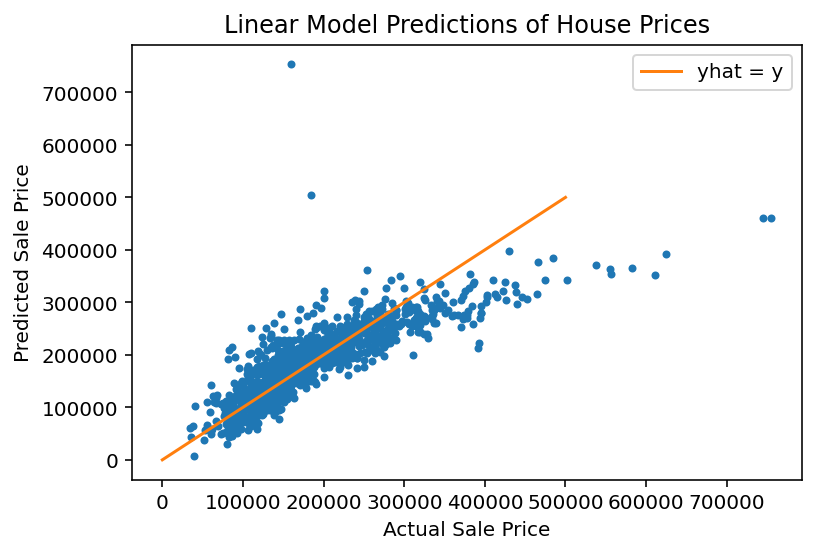

In [26]:
plt.figure()
plt.plot(y, y_hat, '.')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Linear Model Predictions of House Prices')
plt.plot([0, 500000], [0, 500000], '-', label='yhat = y')
plt.legend(loc = 'best');

We see that the model does a reasonable job for house values less than about \$250,000. 

For a better model, we'd want to consider more features of each house, and perhaps some additional functions such as polynomials as components of our model.